<a href="https://colab.research.google.com/github/wei-jun7/DataAnalytics2023_WeijunLi/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 (10 points): Describe a machine learning problem that you would like to solve using
Logistic Regression. Clearly state why Logistic regression is the best choice for solving this
problem

The Machine learing problem I want to solove is apple Apple Quality which it is a binary classification. There have 7 feature to affect the quality of the apple, such as size, Weight, Sweetness and so on. The most important thing is  the Quality is the binary with it is 0 or 1. 1 for good and 0 for bad. As the logistic regression the result require between 0 to 1 which our data is best fit on it. Moreover, it goes beyond mere classification by estimating the likelihood of each category, offering a nuanced view of results, especially useful for apples that don't clearly fall into one group. Additionally, the model's interpretability is a key strength. It clearly indicates which characteristics most significantly impact apple quality, making logistic regression not only effective but also insightful for this classification challenge.



Task 2 (20 points): Pick a publicly available dataset (except The Titanic Dataset) that you will
use to solve this problem. You must provide a link to the dataset and perform the necessary
Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a
justification of why these were required. For example, if the dataset has lot of missing values,
then why did you use a specific technique when handling missing data. This task may include
data visualization

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/apple_quality.csv')



The first step is read the data into the vector array which I will use the pandas to do it.

In [5]:

data.isna().sum()  # As we can see the last one is empty so we should remove it.
print(data.shape)
row = data.iloc[4000]
print(row)
data = data.iloc[:4000]
print(data.shape)

data = data.iloc[:4000,:]
data.describe()



(4001, 9)
A_id                                         NaN
Size                                         NaN
Weight                                       NaN
Sweetness                                    NaN
Crunchiness                                  NaN
Juiciness                                    NaN
Ripeness                                     NaN
Acidity        Created_by_Nidula_Elgiriyewithana
Quality                                      NaN
Name: 4000, dtype: object
(4000, 9)


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


The Second step find any NAN data in the dataset I found out the last row is use for author name with we should delete this row which affect the model accuracy. I use the the iloc to remove it and use the describe() function to see summary of each feature.

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


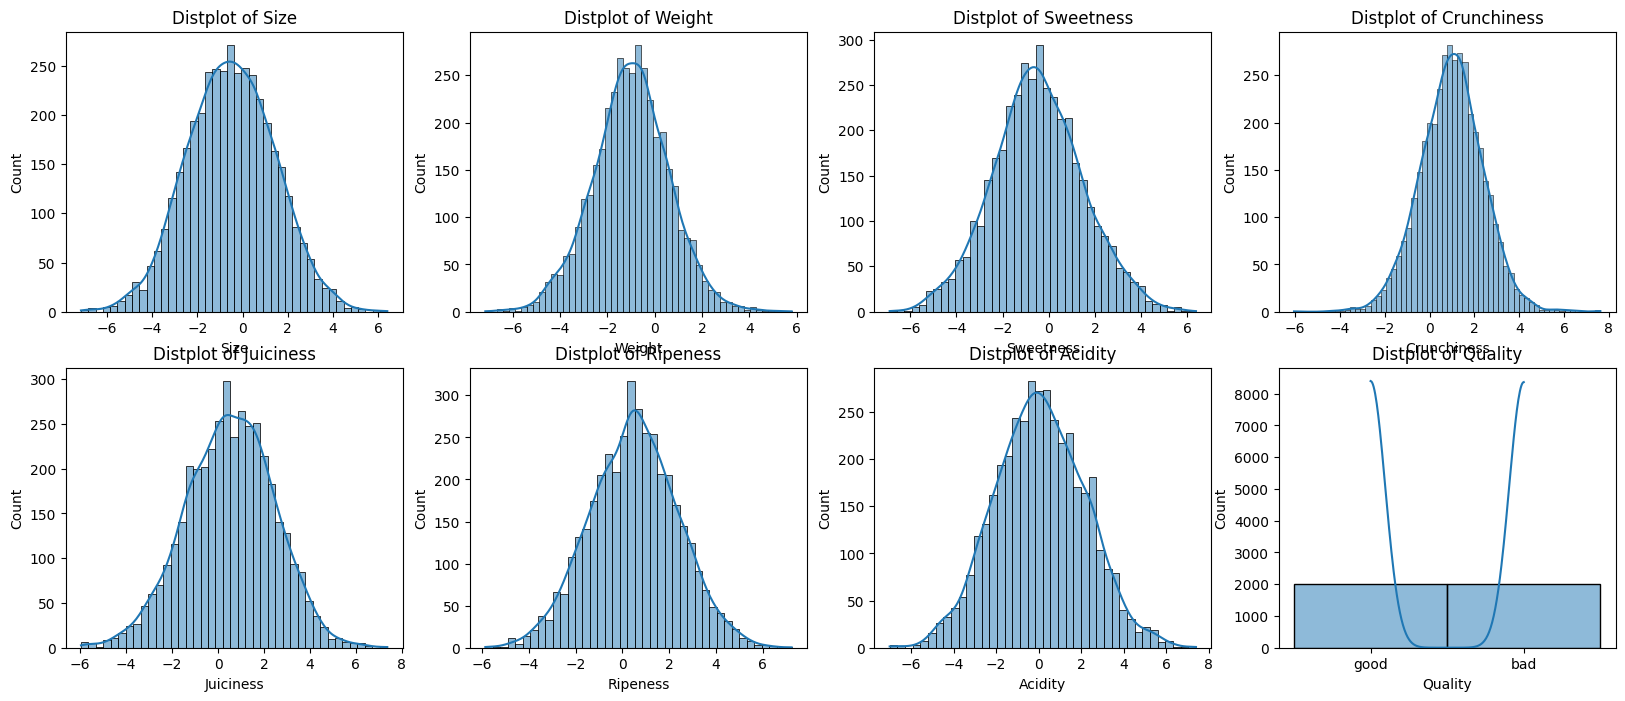

In [6]:
print(data.columns)

data = data.drop(labels='A_id',axis=1)# as we know the id number should not be the model with with affect the model accuracy
type(data['Acidity'][0])
data['Acidity']=data['Acidity'].astype(float)#it origin is str but we should change to float with let it show in the graph
fig, axs=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
axs = axs.flatten()
for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Distplot of {column}')


I remove the A_id with it indicate each sample in our dataset but it is not import with we have the row to indicate the each sample. Next, I creat the each feature to see the disturbution. As we can see most all the feature expect the quality have the normal disturbution. It is a good sign with indicate our model can handel the target value with good quality and bad quality.

<ipython-input-7-7c6f6bed14e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cor = data.corr()


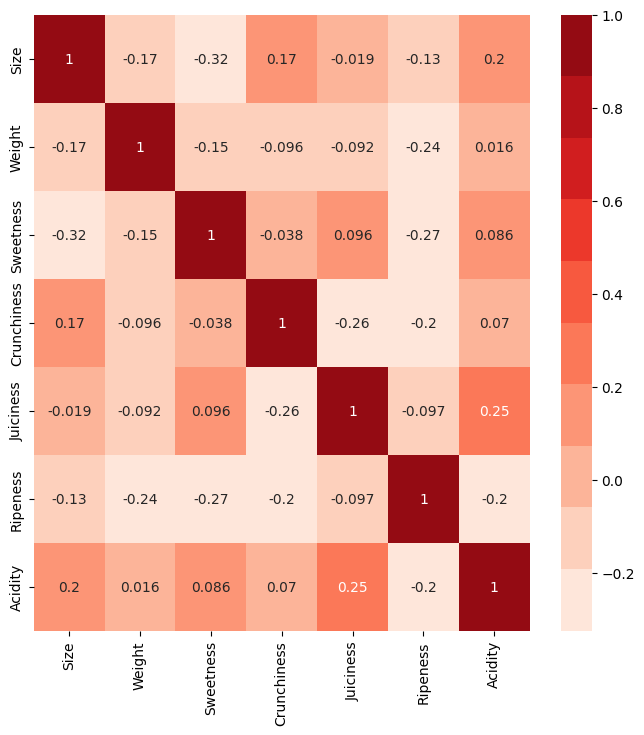

In [7]:
data_cor = data.corr()
plt.figure(figsize=(8,8))
cmap_rb = sns.color_palette("Reds", 10)
sns.heatmap(data_cor,cmap=cmap_rb,annot=True)
plt.show()

I creat the one heat map to see the each feature relationship with we can see teh the strongest postive relationship is size and acidity which mean that the size bigger the acidity stronger. The strongest negtive realtionis is size and sweetness which bigger size less sweetness. In overall, each feature is not have strong relationship which it better to use the logistic regression to find out the relationship between each feature.

Task 3 (25 points): Implement, Logistic Regression in this step. Clearly write your cost function
and derivatives before implementing gradient descent. Do not use any built-in packages for this
step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants
of gradient descent in their original form. (Refer to the research paper discussed in class).


In [8]:
import numpy as np

def sigmoid(z):
    # Ensure z is a NumPy array
    z = np.array(z, dtype=float)

    # Prevent numerical overflow
    z_safe = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z_safe))

def compute_cost(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
    return cost

def batch_gradient_descent(X, y, theta, alpha, iterations):
    m = y.size

    # Ensure y is a 1D array if it's a 2D array with a single column
    if y.ndim > 1:
        y = y.ravel()

    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)

        # Debugging print statements
        # print("Shape of theta:", theta.shape, "Type of theta:", theta.dtype)
        # print("Shape of gradient:", gradient.shape, "Type of gradient:", gradient.dtype)

        theta -= alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


# Data preprocessing
data['Quality'] = np.where(data['Quality'] == 'good',1,0)
dataset = data.to_numpy()
np.random.shuffle(dataset)
X = dataset[:, :-1]
y = dataset[:, -1]
split_size = int(0.8 * len(X))
X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]
# y_train = np.where(y_train == 'good', 1, 0)
# y_test = np.where(y_test == 'good', 1, 0)

# Convert to numpy arrays and reshape if necessary
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 1)

# Add an intercept term to X_train and X_test
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 1000

# Train the model
theta_final, cost_history = batch_gradient_descent(X_train, y_train, theta, alpha, iterations)

# Output the final parameters and cost history
print("Final theta:", theta_final)
print("Final cost:", cost_history[-1])


Final theta: [ 0.26643388  0.50421295  0.1465876   0.43766949  0.07480835  0.42872291
 -0.15474056 -0.25102674]
Final cost: 0.5228254395946723


In [9]:
predictions = sigmoid(np.dot(X_test, theta_final)) >= 0.5
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.49991875


In [10]:
import numpy as np

def sigmoid(z):
    # Ensure z is a NumPy array
    z = np.array(z, dtype=float)

    # Prevent numerical overflow
    z_safe = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z_safe))

def compute_cost(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
    return cost

def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = y.size

    # Ensure y is a 1D array if it's a 2D array with a single column
    if y.ndim > 1:
        y = y.ravel()

    cost_history = np.zeros(iterations)

    for it in range(iterations):
        # Shuffle the data for each iteration
        indices = np.arange(m)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            hi = sigmoid(xi.dot(theta))
            gradient = xi.T * (hi - yi)
            theta -= alpha * gradient

            # Optionally, compute cost (can be omitted for faster performance)
            cost_history[it] = compute_cost(X, y, theta)

    return theta, cost_history


# Data preprocessing
data['Quality'] = np.where(data['Quality'] == 'good',1,0)
dataset = data.to_numpy()
np.random.shuffle(dataset)
X = dataset[:, :-1]
y = dataset[:, -1]
split_size = int(0.8 * len(X))
X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]
# y_train = np.where(y_train == 'good', 1, 0)
# y_test = np.where(y_test == 'good', 1, 0)

# Convert to numpy arrays and reshape if necessary
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 1)

# Add an intercept term to X_train and X_test
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 1000

# Train the model
theta_final, cost_history = batch_gradient_descent(X_train, y_train, theta, alpha, iterations)

# Output the final parameters and cost history
print("Final theta:", theta_final)
print("Final cost:", cost_history[-1])



Final theta: [-1.48805518  0.40074141  0.47018907  0.30675729 -0.63019801 -0.29186389
 -0.1417272  -0.11591324]
Final cost: 0.0928605507631018


In [11]:
predictions = sigmoid(np.dot(X_test, theta_final)) >= 0.5
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.985


Task 4 (45 points): Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’
gradient descent. Implement both. You may implement these algorithms yourself OR use a
package. In your conclusion, compare both optimization techniques/algorithms with respect to
the results you achieve. Also compare these results with the original implementation of
gradient descent (Task 3 above). Describe why we should or why we should not use
optimization algorithms for the task at hand. For comparison of these algorithms define an
evaluation metric appropriate for your problem.